#### 1. Evaluate the Data in tabular form by providing : Group mean, SD and SEM

In [1]:
# we have to import the required libraries
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [8]:
# lets opent the csv file
data= pd.read_csv("C:\\Users\\colli\\OneDrive\\Desktop\\stat_analysis.csv")
df=pd.DataFrame(data)
df1=df.dropna()
print(df1)

    sample no. treatment  infarct size (%)  ST 10' (mV)  ST 30' (mV)  \
0          1.0         c              52.0          2.9          4.1   
1          2.0         t              30.0          1.1         -1.6   
2          3.0         p              10.0         -2.2         -3.4   
3          4.0         c              54.0          1.0         -0.2   
4          5.0         c              56.0          0.5         -1.3   
5          6.0         p              20.0          2.8          1.1   
6          7.0         t              32.0          3.5          0.8   
7          8.0         t              41.0         -1.2          1.4   
8          9.0         t              22.0          4.3          1.8   
9         10.0         p              13.0          1.9          4.1   
10        11.0         t              36.0          2.0          1.4   
11        12.0         c              50.0          0.4          2.1   
12        13.0         t              33.0         -0.4         

In [9]:
# calculate the group mean, SD and SEM 
grouped= df1.groupby("treatment").agg(["mean", "std", "sem"])
print(grouped)

          sample no.                     infarct size (%)                      \
                mean       std       sem             mean       std       sem   
treatment                                                                       
c               13.0  8.170067  2.723356        48.444444  4.876246  1.625415   
p               10.0  5.612486  2.509980        14.600000  3.646917  1.630951   
t               13.3  7.071853  2.236316        30.900000  5.130519  1.622412   

          ST 10' (mV)                     ST 30' (mV)                      \
                 mean       std       sem        mean       std       sem   
treatment                                                                   
c           -0.033333  1.708069  0.569356        0.70  1.917029  0.639010   
p            1.560000  2.154762  0.963639        0.44  2.788907  1.247237   
t            1.250000  1.936348  0.612327        0.89  1.602394  0.506721   

          ST 50' (mV)                     ST 180' 

#### 2. Perform the corresponding statistical comparison of groups by time and treatment for both parameters

In [11]:
# let's perform ANOVA for each ST parameter 
#create an empty dictionary to store the results of each parameter
anova_results={}
for param in ["ST 10' (mV)", "ST 30' (mV)", "ST 50' (mV)", "ST 180' (mV)"]:
    anova_results[param]= stats.f_oneway(
         df1[df1["treatment"]=="c"][param],
         df1[df1["treatment"]=="t"][param],
         df1[df1["treatment"]=="p"][param]
    )
print("\nANOVA results:")
for param, result in anova_results.items():
     print(f"{param}: F-statistic={result.statistic}, p-value={result.pvalue}")


ANOVA results:
ST 10' (mV): F-statistic=1.5455476690854781, p-value=0.23648786391043844
ST 30' (mV): F-statistic=0.08588751629375398, p-value=0.9180181196543185
ST 50' (mV): F-statistic=9.085359040164693, p-value=0.0014361721369458315
ST 180' (mV): F-statistic=2.1744700334519003, p-value=0.13858768699768262


In [12]:
#lets perform the Tukey HSD test to dig deep into significance differences
tukey_results= {}
for param in ["ST 10' (mV)", "ST 30' (mV)", "ST 50' (mV)", "ST 180' (mV)"]:
     #combine data for the current parameter and the corresponding treatments
     dt= df1[[param, "treatment"]]
     tukey= pairwise_tukeyhsd(endog=dt[param], groups=dt["treatment"], alpha=0.05)
     tukey_results[param]= tukey
#print the results
for param, result in tukey_results.items():
    print(f"\nTukey HSD results for{param}:")
    print(result)



Tukey HSD results forST 10' (mV):
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     c      p   1.5933 0.3089 -1.0752 4.2619  False
     c      t   1.2833 0.3243 -0.9149 3.4815  False
     p      t    -0.31 0.9523 -2.9304 2.3104  False
---------------------------------------------------

Tukey HSD results forST 30' (mV):
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     c      p    -0.26 0.9704 -3.0655 2.5455  False
     c      t     0.19 0.9766  -2.121  2.501  False
     p      t     0.45 0.9112 -2.3049 3.2049  False
---------------------------------------------------

Tukey HSD results forST 50' (mV):
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     c  

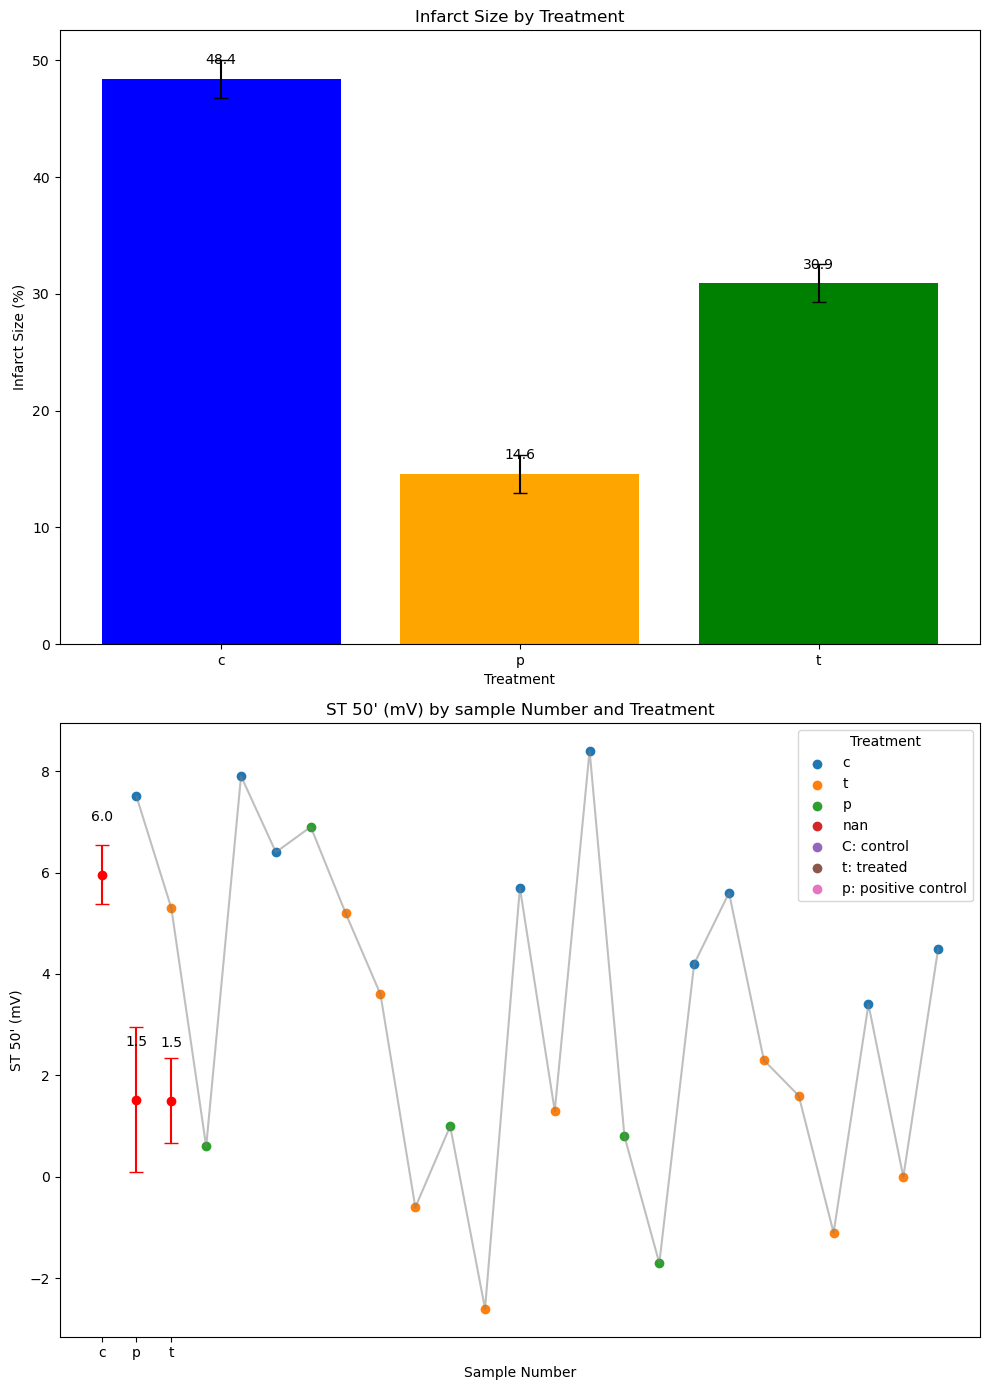

In [15]:
#calculate mean and SEM for infarct size by treatment
infarct_mean= df1.groupby("treatment")["infarct size (%)"].mean()
infarct_sem= df1.groupby("treatment")["infarct size (%)"].sem()

#calculate mean and SEM for ST 50' (mV) by treatment
st_mean= df1.groupby("treatment")["ST 50' (mV)"].mean()
st_sem=df1.groupby("treatment")["ST 50' (mV)"].sem()

#plotting
fig, (ax1, ax2)= plt.subplots(2,1, figsize=(10, 14))
# bar plot for infarct size
ax1.bar(infarct_mean.index, infarct_mean, yerr=infarct_sem, capsize=5, color=["blue", "orange", "green"])
ax1.set_title("Infarct Size by Treatment")
ax1.set_ylabel("Infarct Size (%)")
ax1.set_xlabel("Treatment")
for i, v in enumerate(infarct_mean):
     ax1.text(i, v + 1, f"{v:.1f}", ha="center", va="bottom")

#scatter plot for ST 50' (mV)
for treatment in df["treatment"].unique():
     subset=df1[df1["treatment"]==treatment]
     ax2.scatter(subset["sample no."], subset["ST 50' (mV)"], label=treatment)
#connecting line plot
ax2.plot(df1["sample no."], df1["ST 50' (mV)"], linestyle="-", color="grey", alpha=0.5)

ax2.errorbar(st_mean.index, st_mean, yerr=st_sem, fmt="o", color="red", capsize=5)
ax2.set_title("ST 50' (mV) by sample Number and Treatment")
ax2.set_ylabel("ST 50' (mV)")
ax2.set_xlabel("Sample Number")
ax2.legend(title="Treatment")
for i, v in enumerate(st_mean):
     ax2.text(i, v + 1, f"{v:.1f}", ha="center", va="bottom")
plt.tight_layout()
plt.show()